In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
train=pd.read_csv('titanic_train.csv')

In [30]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


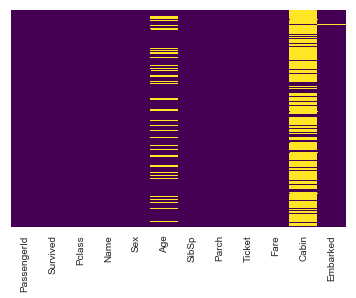

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

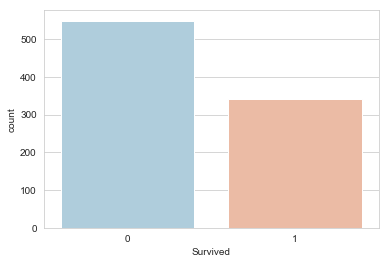

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

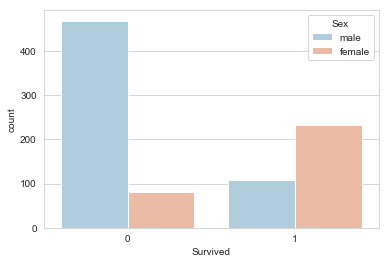

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

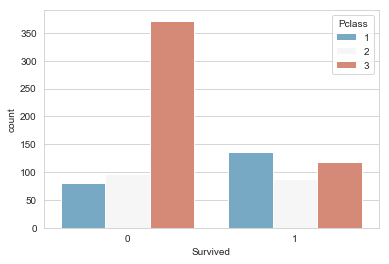

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='RdBu_r')

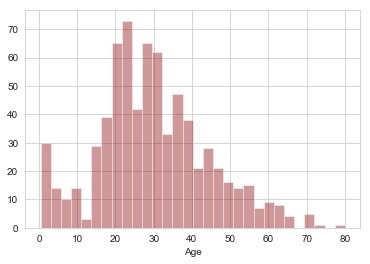

In [17]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

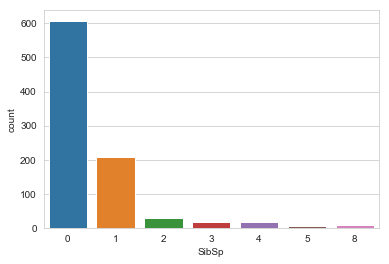

In [18]:
sns.countplot(x='SibSp',data=train)

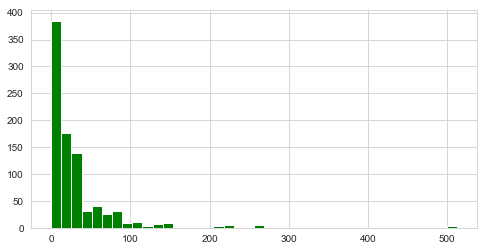

In [20]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

#There are some people in range of 20-25 age  who are travelling in fare(free).Because they are workers of that ship. So they dont invite their siblings because they are on duty.

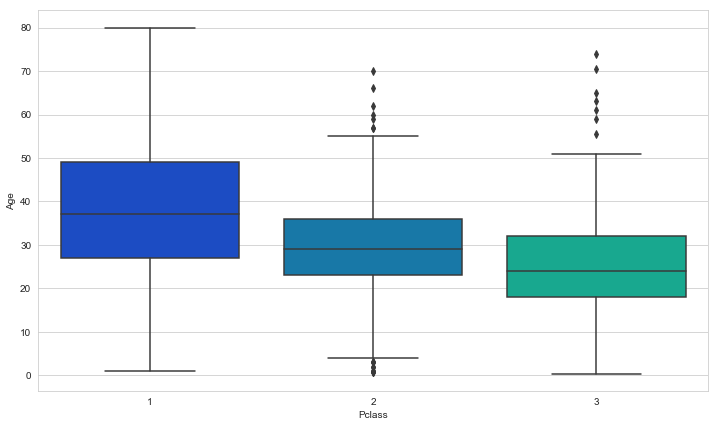

In [22]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [25]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Now apply that function

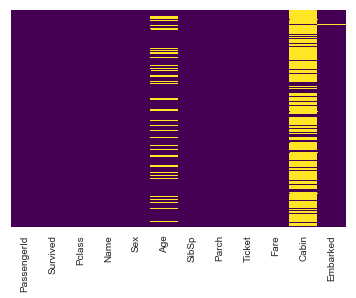

In [27]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
train.drop('Cabin',axis=1,inplace=True)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [37]:
train.drop(inplace=True)

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [38]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [39]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [40]:
train=pd.concat([train,sex,embark],axis=1)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


#LOGISTIC REGRESSION

In [58]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
print(X_train,y_train)

     PassengerId  Pclass    Age  SibSp  Parch      Fare  male  Q  S
520          521       1  30.00      0      0   93.5000     0  0  1
510          511       3  29.00      0      0    7.7500     1  1  0
446          447       2  13.00      0      1   19.5000     0  0  1
2              3       3  26.00      0      0    7.9250     0  0  1
691          692       3   4.00      0      1   13.4167     0  0  0
195          196       1  58.00      0      0  146.5208     0  0  0
790          791       3    NaN      0      0    7.7500     1  1  0
257          258       1  30.00      0      0   86.5000     0  0  1
39            40       3  14.00      1      0   11.2417     0  0  0
234          235       2  24.00      0      0   10.5000     1  0  1
832          833       3    NaN      0      0    7.2292     1  0  0
341          342       1  24.00      3      2  263.0000     0  0  1
646          647       3  19.00      0      0    7.8958     1  0  1
670          671       2  40.00      1      1   

In [76]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [77]:
from sklearn.metrics import classification_report

In [78]:
predictions = logmodel.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet

In [79]:
print(classification_report(y_test,predictions))

NameError: name 'predictions' is not defined